In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Business Background

Supermarket Mona operates in a competitive market, offering a diverse range of products from everyday groceries to premium items like wines and gold products. The following dataset represents customer engagement for a supermarket over the last 2 years. The data includes :
- demographic information
- purchase history across products
- customer preferred channel
- campaign acceptance history

# Data details

People
Supermarket Customers Data Dictionary
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

# Business Problem

The primary business problem is how to find the best approach to optimize sales strategies, which includes how to tailor discounts, premium services, etc to match the right customer. The next step is to find which customer will be the most receptive to which strategies. By leveraging the data-driven insights, the supermarket will have increased chance of successfully executing the sales strategies and yield good response from customers, thus increasing sales.

# Data Analysis Objective 

The objective of this data analysis is to clean and analyze the supermarket's customer data to gain insights into customer segments and their shopping behaviors. The focus will be on:
- Data cleaning (filling or removing null values , allocating ambiguous data, adding summary collumns, etc)
- Visualization with tableau

In which the ultimate goal is to hopefully INCREASE SALES. The strategies are :
- Segmenting the customer base in categories (Income and product preferences)
- Recommending deals and promotions for each segment to maximize the supermarket's resources efficiency

In [2]:
df = pd.read_csv("Supermarket Customers.csv",sep=None)
df

/var/folders/dz/1xdxcyhn3d1740p67b4ktyzr0000gn/T/ipykernel_4135/3441794705.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("Supermarket Customers.csv",sep=None)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)

# removing uneeded columns and duplicates

In [5]:
df.drop(columns=["Z_CostContact","Z_Revenue","ID"],inplace=True)
df.drop_duplicates(inplace=True)

In [44]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal,TotalPurchaseTimes,TotalCmp,Age,AgeSegment,IncomeSegment,WineSegment,FruitSegment,MeatSegment,FishSegment,SweetSegment,GoldSegment
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,1,67,Seniors (50 and above),Medium Income,Level 3 (Frequent),PRIORITY Level,PRIORITY Level,PRIORITY Level,PRIORITY Level,Level 3 (Frequent)
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,0,70,Seniors (50 and above),Medium Income,Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional)
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,0,59,Seniors (50 and above),High Income,Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle)
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,0,40,Middle Age (30-49),Low Income,Level 1 (Occasional),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 1 (Occasional)
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,0,43,Middle Age (30-49),Medium Income,Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,22,3,0,38,Middle Age (30-49),Low Income,Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 2 (Middle),Level 1 (Occasional)
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16,0,57,Seniors (50 and above),Medium Income,Level 3 (Frequent),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),PRIORITY Level,PRIORITY Level
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18,1,43,Middle Age (30-49),Medium Income,Level 3 (Frequent),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle)
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21,0,68,Seniors (50 and above),High Income,Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 3 (Frequent)


## Alocating ambiguous data in Marital_Status

In [6]:
df["Marital_Status"].value_counts()

Marital_Status
Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [7]:
df[(df["Marital_Status"]=="Alone")|(df["Marital_Status"]=="Absurd")|(df["Marital_Status"]=="YOLO")]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,1958,Master,Alone,61331.0,1,1,10-03-2013,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0
138,1973,PhD,Alone,35860.0,1,1,19-05-2014,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,1
153,1988,Graduation,Alone,34176.0,1,0,12-05-2014,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,0
2093,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0
2177,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


In [8]:
df["Marital_Status"].replace({"Alone":"Single","Absurd":"Single","YOLO":"Single"},inplace=True)

In [9]:
df["Marital_Status"].value_counts()

Marital_Status
Married     795
Together    521
Single      455
Divorced    216
Widow        71
Name: count, dtype: int64

## removing outliers in Income

In [10]:
q1= df["Income"].describe()["25%"]
q3= df["Income"].describe()["75%"]
iqr = q3-q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

In [11]:
df = df.drop(df[(df["Income"]>upper)|(df["Income"]<lower)].index)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


<Axes: ylabel='Income'>

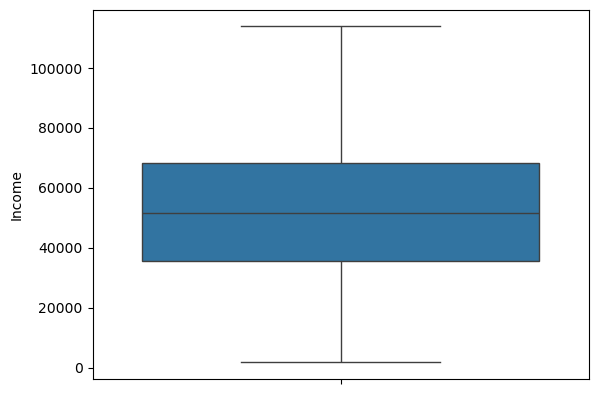

In [12]:
sns.boxplot(df["Income"])

## filling empty Income values with median

In [13]:
df["Income"].fillna(df["Income"].describe()["50%"],inplace=True)

In [14]:
df["Income"].describe()

count      2050.000000
mean      51686.238049
std       20585.297555
min        1730.000000
25%       35685.000000
50%       51411.500000
75%       68046.750000
max      113734.000000
Name: Income, dtype: float64

## creating MntTotal column for total purchases across products

In [15]:
df["MntTotal"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,22
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843


## creating TotalPurcahaseTimes column for total times purchases across channel

In [16]:
df["TotalPurchaseTimes"] = df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal,TotalPurchaseTimes
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,22,3
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21


## creating TotalCmp for total accepted campaign existed in the past

In [17]:
df["TotalCmp"] = df["AcceptedCmp3"] + df["AcceptedCmp4"] +df["AcceptedCmp5"]+df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["Response"]
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntTotal,TotalPurchaseTimes,TotalCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,22,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,4,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,20,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,6,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,22,3,0
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341,16,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241,18,1
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843,21,0


## Segmenting customer demography by age

In [18]:
df["Age"] = 2024 - df["Year_Birth"]

def age_segment(age):
    if age <= 29:
        return "Young Adults (18-29)"
    elif age <= 49:
        return "Middle Age (30-49)"
    else:
        return "Seniors (50 and above)"

df["AgeSegment"] = df["Age"].apply(age_segment)

## Segmenting customer demography by income

In [19]:
df["Income"].describe()

count      2050.000000
mean      51686.238049
std       20585.297555
min        1730.000000
25%       35685.000000
50%       51411.500000
75%       68046.750000
max      113734.000000
Name: Income, dtype: float64

In [20]:
def income_segment(income):
    if income <= df["Income"].describe()["25%"]:
        return "Low Income"
    elif income <= df["Income"].describe()["75%"]:
        return "Medium Income"
    else:
        return "High Income"

df["IncomeSegment"] = df["Income"].apply(income_segment)

Text(0.5, 1.0, 'Customer segment : income to amount spent')

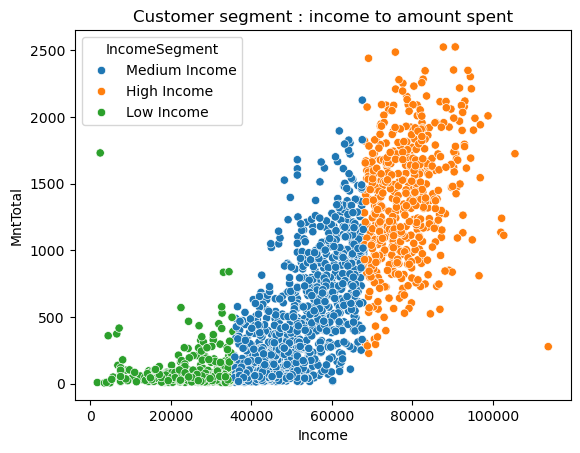

In [21]:
sns.scatterplot(df,x="Income",y="MntTotal",hue="IncomeSegment")
plt.title("Customer segment : income to amount spent")

<Axes: >

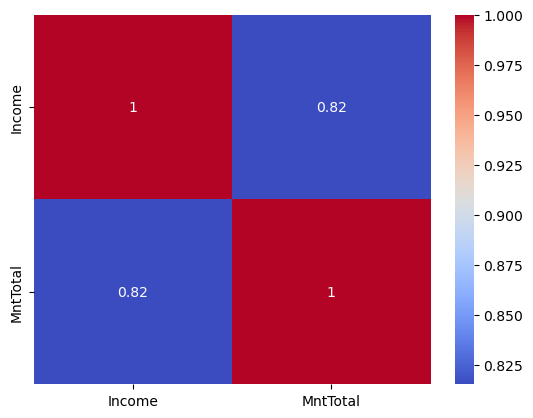

In [22]:
#proving the correlation between income and amount spent
sns.heatmap(df[["Income","MntTotal"]].corr(),annot=True,cmap="coolwarm")

## Segmenting customer by their product preferences

In [23]:
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,305.004390,26.319512,165.932195,37.458537,27.278049,44.029756
std,336.732104,39.803174,221.515958,54.723641,41.763794,52.167257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.250000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,505.000000,33.000000,227.750000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [24]:
q1=df["MntWines"].describe()["25%"]
q3=df["MntWines"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def wine_segment(wine):
    if wine <= q1:
        return "Level 1 (Occasional)"
    elif wine <= q3:
        return "Level 2 (Middle)"
    elif wine <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["WineSegment"] = df["MntWines"].apply(wine_segment)

Text(0.5, 1.0, 'Customer spread')

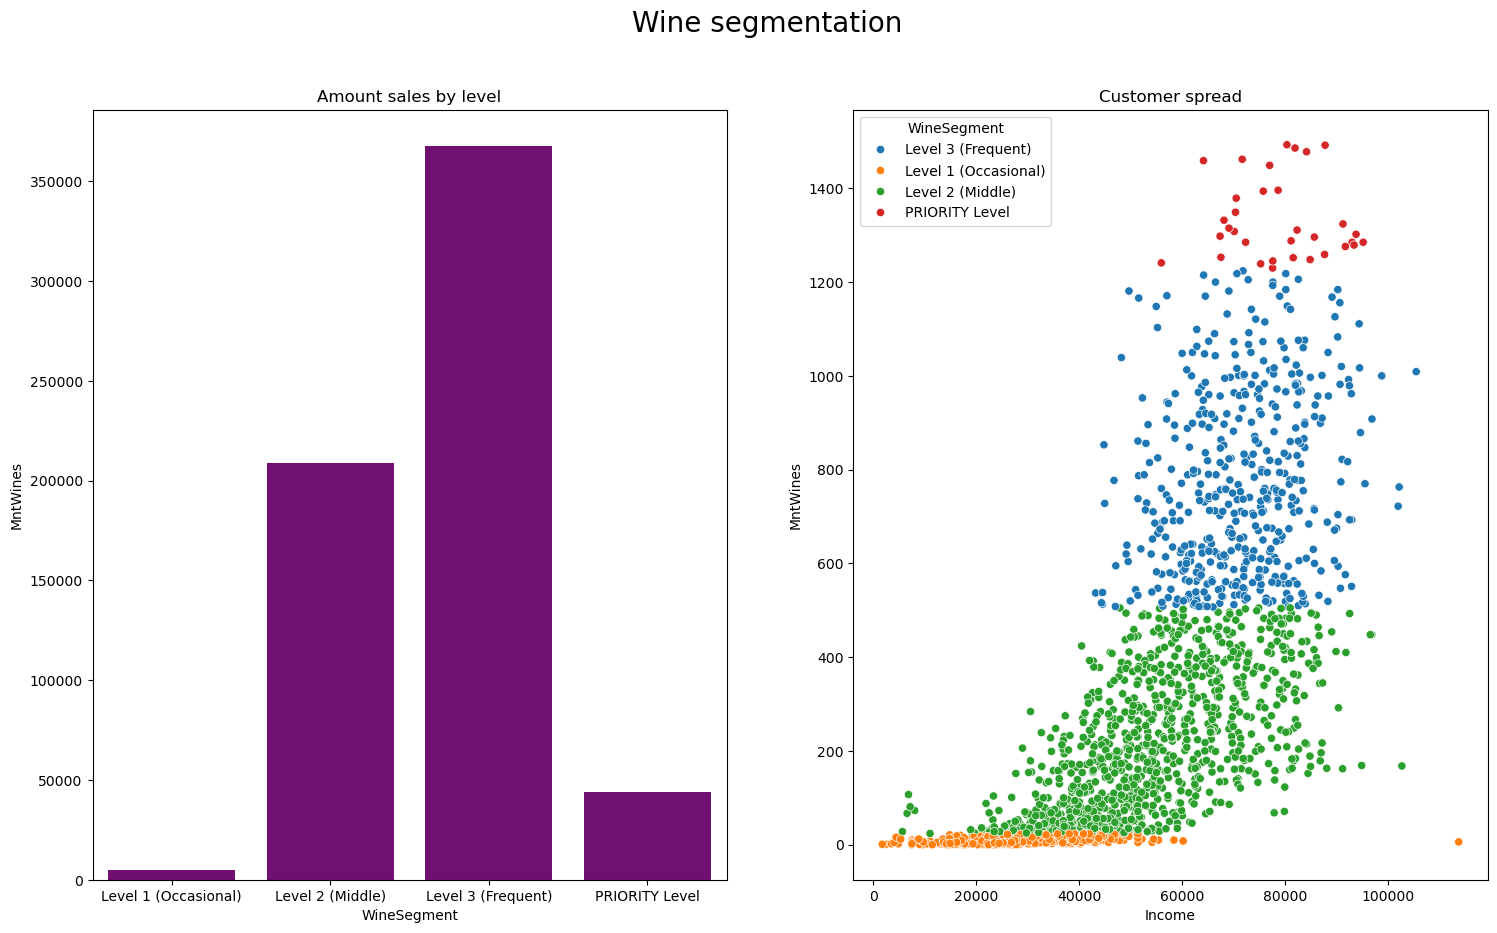

In [25]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Wine segmentation", size = 20)
sns.barplot(df.groupby("WineSegment")["MntWines"].agg(func="sum"),color="purple",ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntWines",hue="WineSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [26]:
q1=df["MntFruits"].describe()["25%"]
q3=df["MntFruits"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def fruit_segment(fruit):
    if fruit <= q1:
        return "Level 1 (Occasional)"
    elif fruit <= q3:
        return "Level 2 (Middle)"
    elif fruit <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["FruitSegment"] = df["MntFruits"].apply(fruit_segment)

Text(0.5, 1.0, 'Customer spread')

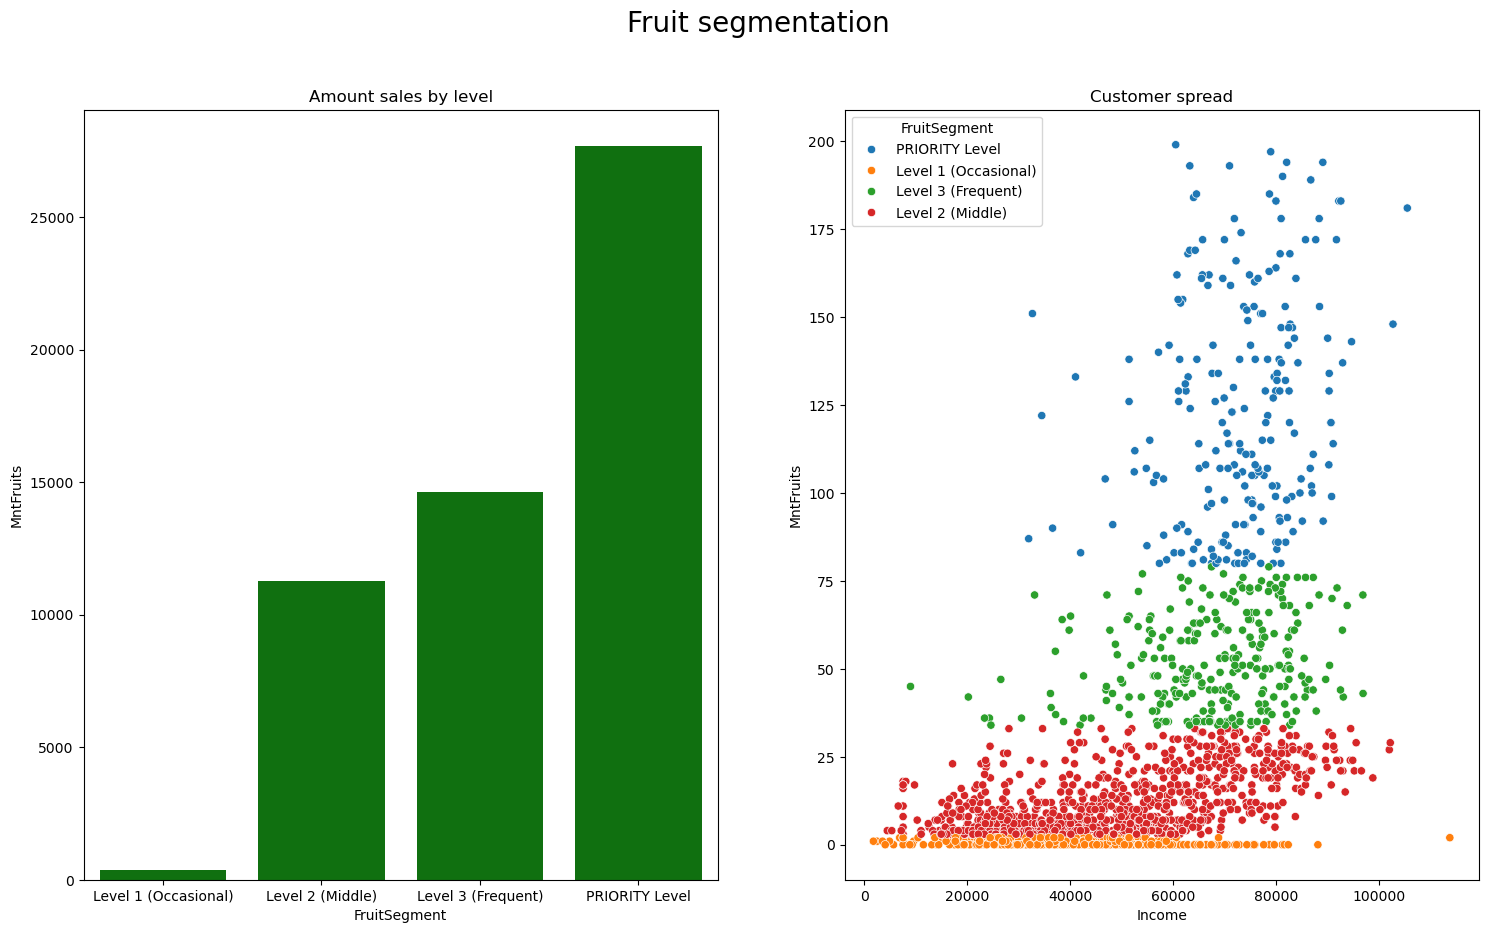

In [27]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Fruit segmentation", size = 20)
sns.barplot(df.groupby("FruitSegment")["MntFruits"].agg(func="sum"),color="green",ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntFruits",hue="FruitSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [28]:
q1=df["MntMeatProducts"].describe()["25%"]
q3=df["MntMeatProducts"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def meat_segment(meat):
    if meat <= q1:
        return "Level 1 (Occasional)"
    elif meat <= q3:
        return "Level 2 (Middle)"
    elif meat <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["MeatSegment"] = df["MntMeatProducts"].apply(meat_segment)

Text(0.5, 1.0, 'Customer spread')

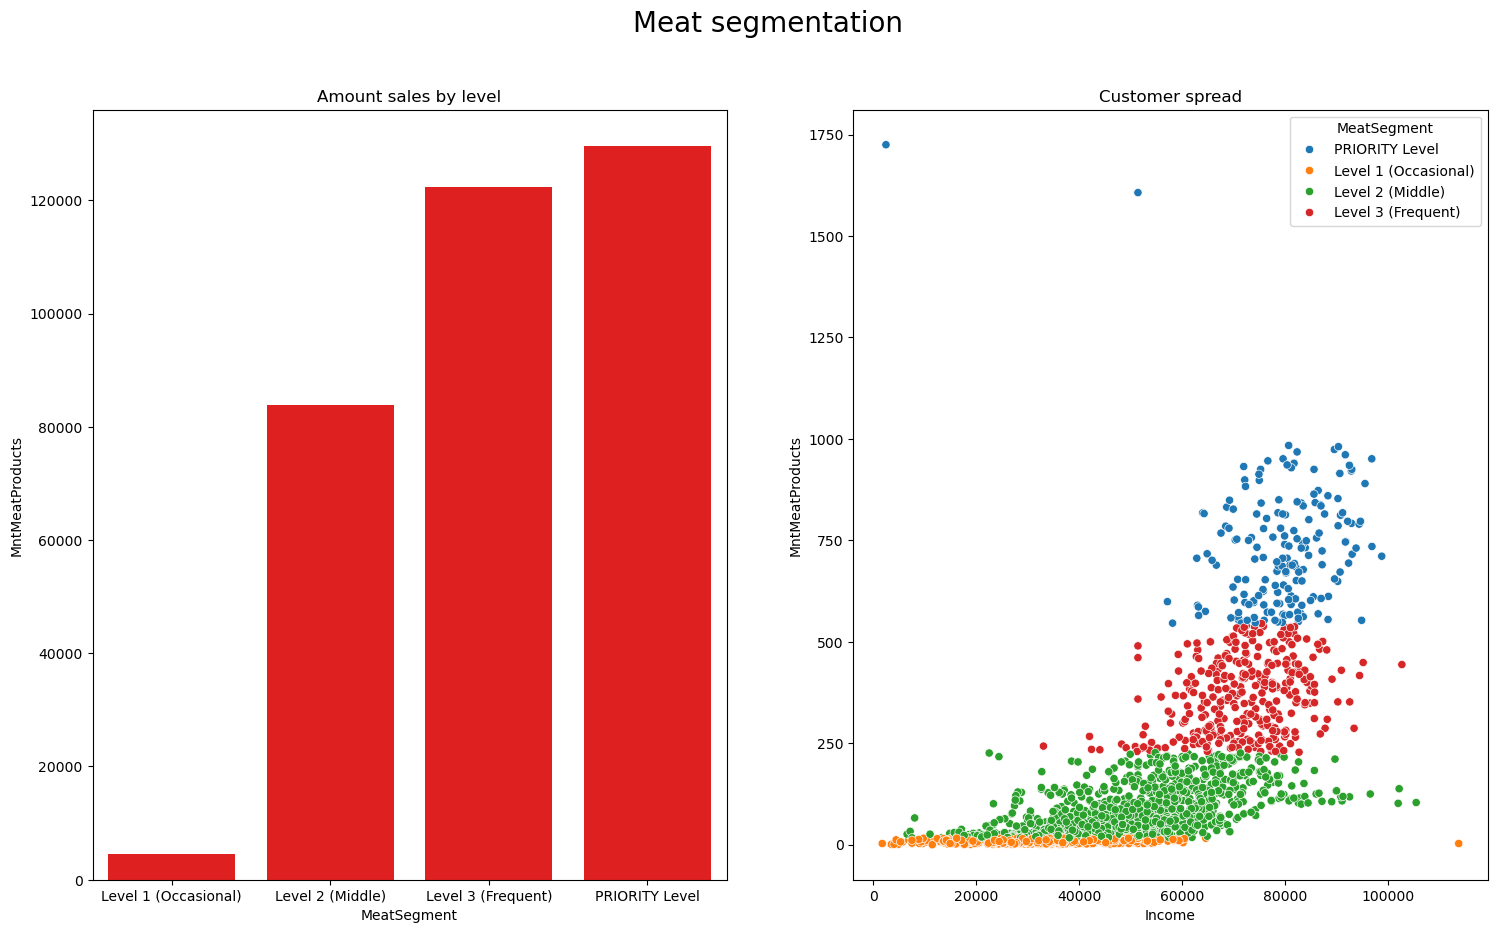

In [29]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Meat segmentation", size = 20)
sns.barplot(df.groupby("MeatSegment")["MntMeatProducts"].agg(func="sum"),color="red",ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntMeatProducts",hue="MeatSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [30]:
q1=df["MntFishProducts"].describe()["25%"]
q3=df["MntFishProducts"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def fish_segment(fish):
    if fish <= q1:
        return "Level 1 (Occasional)"
    elif fish <= q3:
        return "Level 2 (Middle)"
    elif fish <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["FishSegment"] = df["MntFishProducts"].apply(fish_segment)

Text(0.5, 1.0, 'Customer spread')

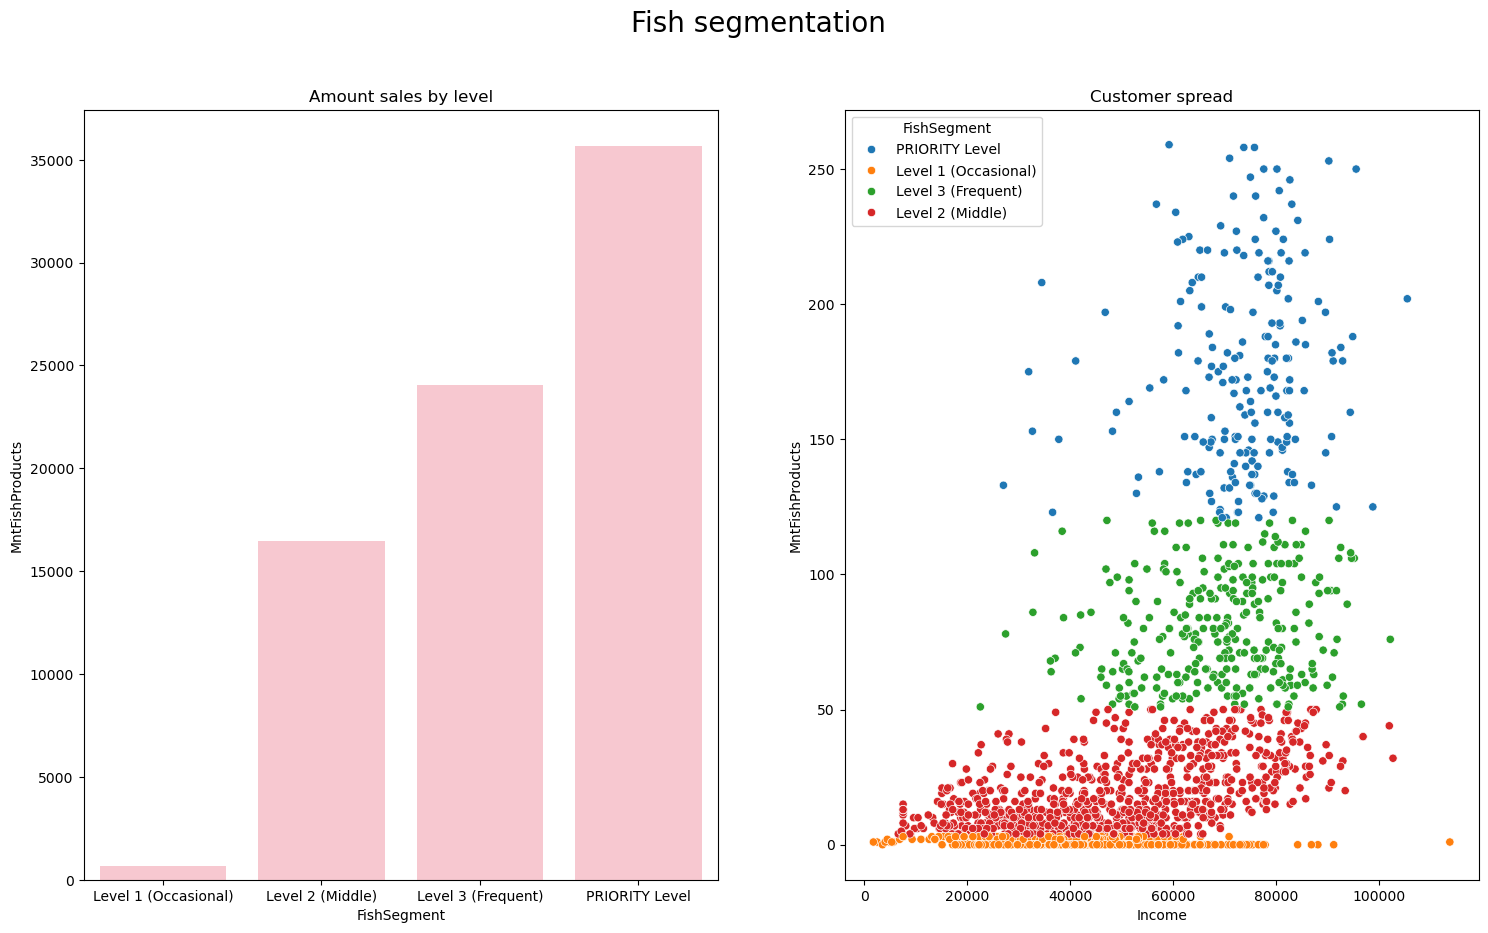

In [31]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Fish segmentation", size = 20)
sns.barplot(df.groupby("FishSegment")["MntFishProducts"].agg(func="sum"),color="pink",ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntFishProducts",hue="FishSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [32]:
q1=df["MntSweetProducts"].describe()["25%"]
q3=df["MntSweetProducts"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def sweet_segment(sweet):
    if sweet <= q1:
        return "Level 1 (Occasional)"
    elif sweet <= q3:
        return "Level 2 (Middle)"
    elif sweet <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["SweetSegment"] = df["MntSweetProducts"].apply(sweet_segment)

Text(0.5, 1.0, 'Customer spread')

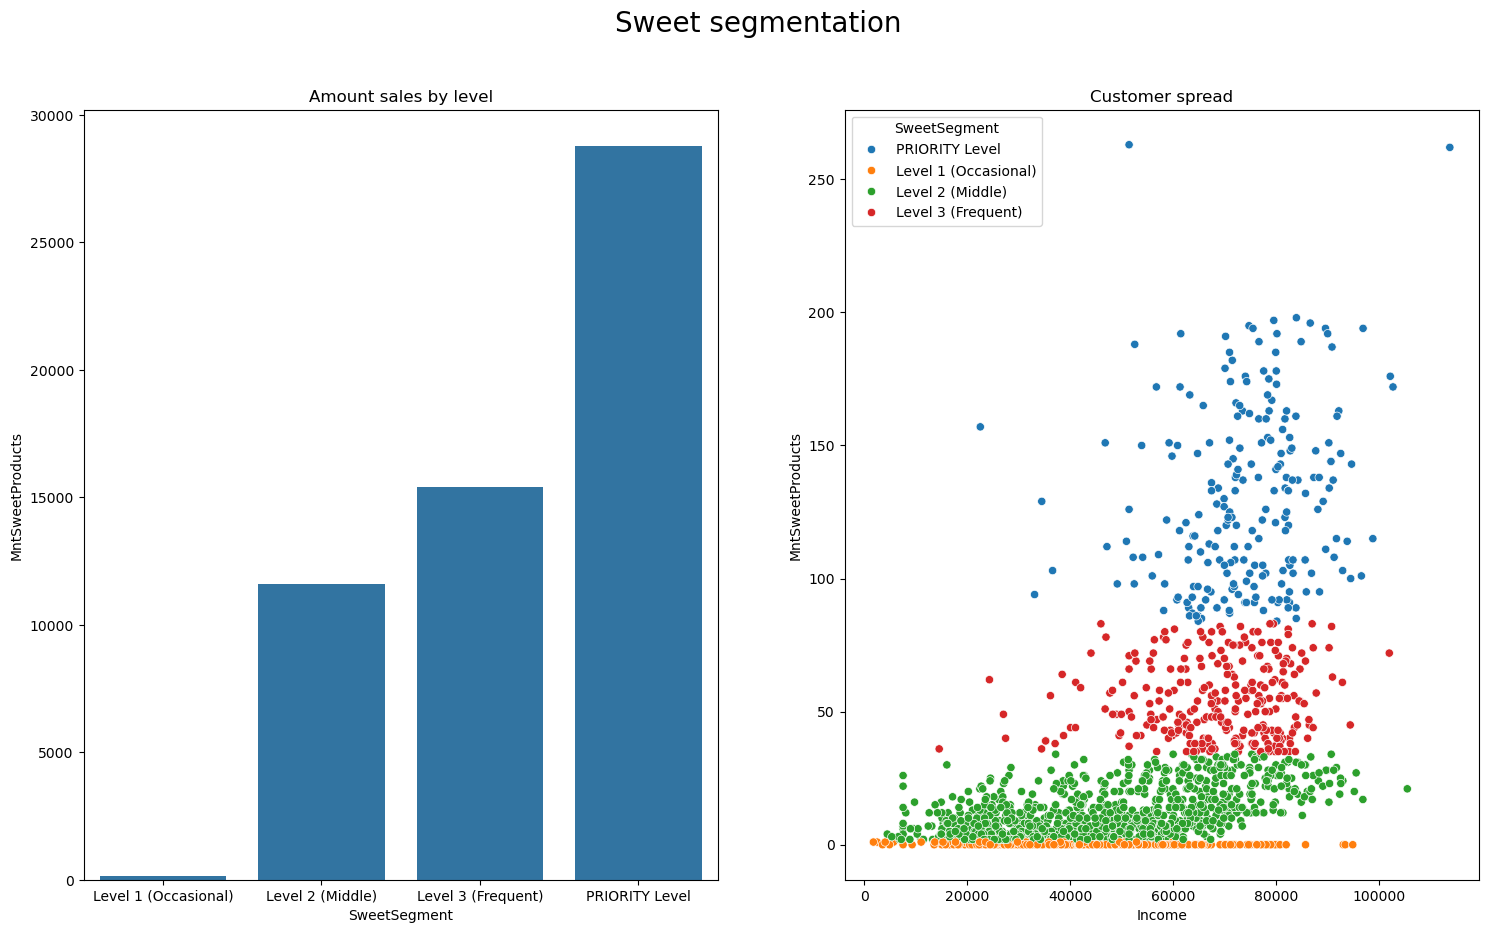

In [33]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Sweet segmentation", size = 20)
sns.barplot(df.groupby("SweetSegment")["MntSweetProducts"].agg(func="sum"),ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntSweetProducts",hue="SweetSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [34]:
q1=df["MntGoldProds"].describe()["25%"]
q3=df["MntGoldProds"].describe()["75%"]
IQR = q3 - q1
upper= q3 + (1.5 * IQR)
def gold_segment(gold):
    if gold <= q1:
        return "Level 1 (Occasional)"
    elif gold <= q3:
        return "Level 2 (Middle)"
    elif gold <= upper:
        return "Level 3 (Frequent)"
    else:
        return "PRIORITY Level" 

df["GoldSegment"] = df["MntGoldProds"].apply(gold_segment)

Text(0.5, 1.0, 'Customer spread')

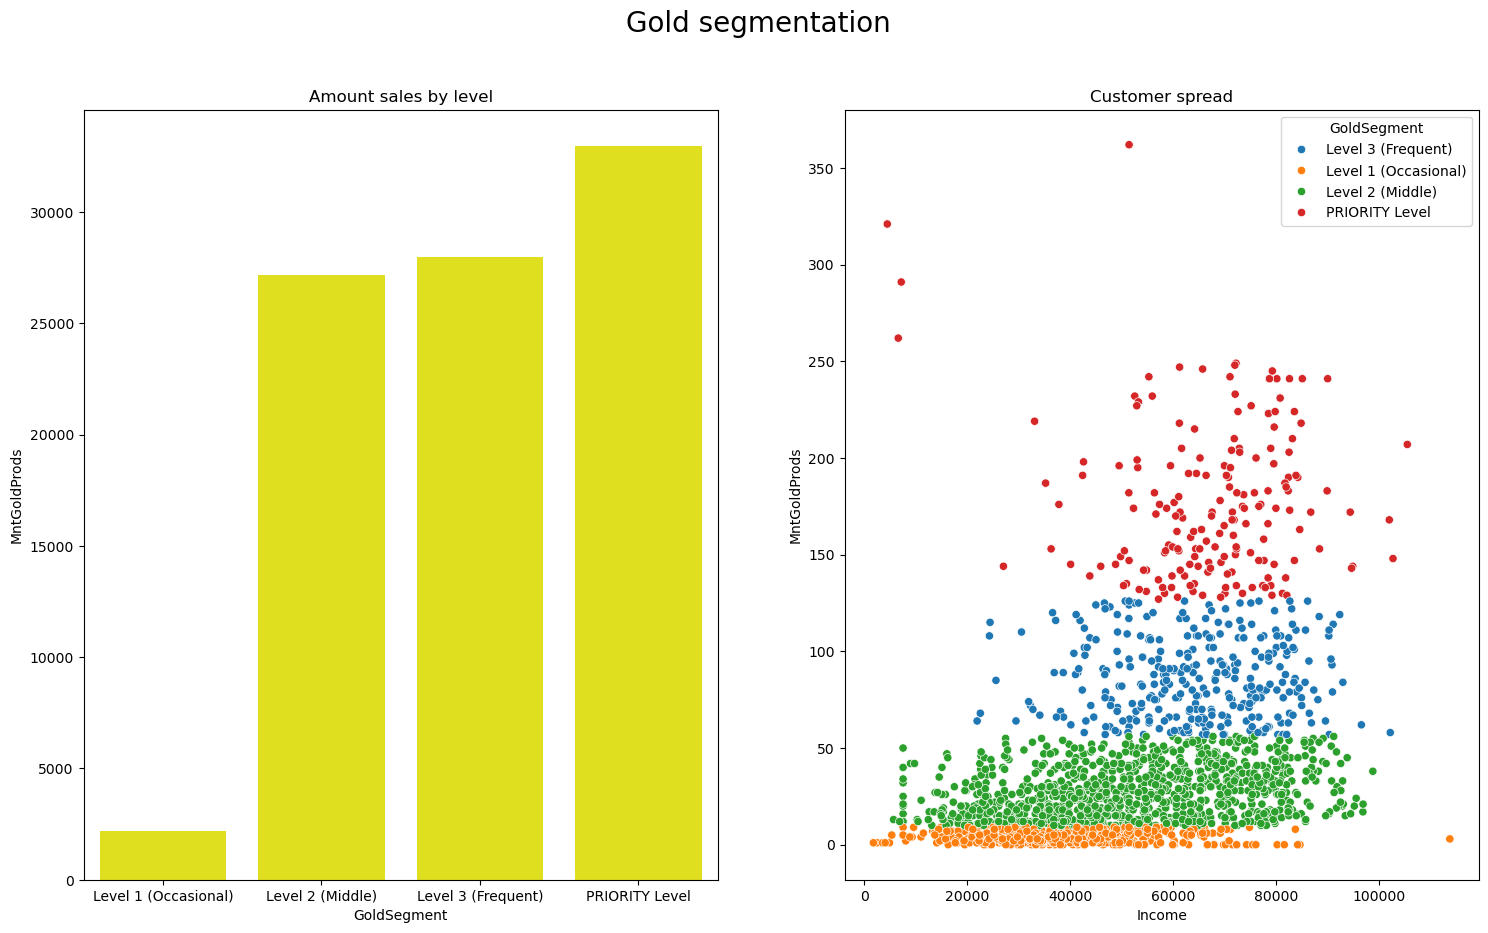

In [35]:
fig , axes = plt.subplots(1,2,figsize=(18,10))
fig.suptitle("Gold segmentation", size = 20)
sns.barplot(df.groupby("GoldSegment")["MntGoldProds"].agg(func="sum"),color="yellow",ax=axes[0])
axes[0].set_title("Amount sales by level")
sns.scatterplot(df,x="Income",y="MntGoldProds",hue="GoldSegment",ax=axes[1])
axes[1].set_title("Customer spread")

In [36]:
df[["AgeSegment","IncomeSegment","WineSegment","FruitSegment","MeatSegment","FishSegment","SweetSegment","GoldSegment"]]

,AgeSegment,IncomeSegment,WineSegment,FruitSegment,MeatSegment,FishSegment,SweetSegment,GoldSegment
0,Seniors (50 and above),Medium Income,Level 3 (Frequent),PRIORITY Level,PRIORITY Level,PRIORITY Level,PRIORITY Level,Level 3 (Frequent)
1,Seniors (50 and above),Medium Income,Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional)
2,Seniors (50 and above),High Income,Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle)
3,Middle Age (30-49),Low Income,Level 1 (Occasional),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 1 (Occasional)
4,Middle Age (30-49),Medium Income,Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle)
...,...,...,...,...,...,...,...,...
2232,Middle Age (30-49),Low Income,Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 1 (Occasional),Level 2 (Middle),Level 1 (Occasional)
2235,Seniors (50 and above),Medium Income,Level 3 (Frequent),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),PRIORITY Level,PRIORITY Level
2237,Middle Age (30-49),Medium Income,Level 3 (Frequent),Level 3 (Frequent),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 2 (Middle)
2238,Seniors (50 and above),High Income,Level 2 (Middle),Level 2 (Middle),Level 2 (Middle),Level 3 (Frequent),Level 2 (Middle),Level 3 (Frequent)


In [37]:
df.groupby(["IncomeSegment"])["Income"].agg(func="mean")

IncomeSegment
High Income      78321.091618
Low Income       25298.959064
Medium Income    51562.208984
Name: Income, dtype: float64

## dropping > 100 age for visualization clarity

In [38]:

df.drop(df[df["Age"]>100].index,inplace=True)

In [39]:
df["AgeSegment"].value_counts()

AgeSegment
Seniors (50 and above)    1336
Middle Age (30-49)         705
Young Adults (18-29)         6
Name: count, dtype: int64

<Axes: ylabel='Age'>

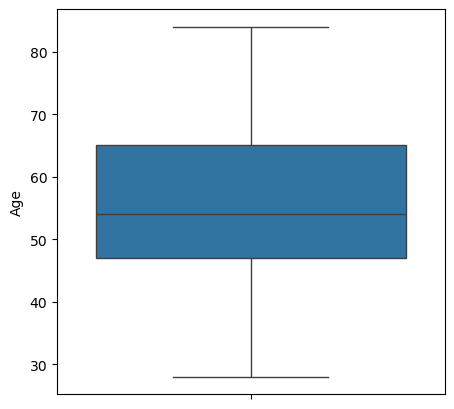

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(df["Age"])

## checking nulls for one last time

In [41]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
MntTotal               0
TotalPurchaseTimes     0
TotalCmp               0
Age                    0
AgeSegment             0
IncomeSegment          0
WineSegment            0
FruitSegment           0
MeatSegment            0
FishSegment            0
SweetSegment           0
GoldSegment            0
dtype: int64

<Axes: >

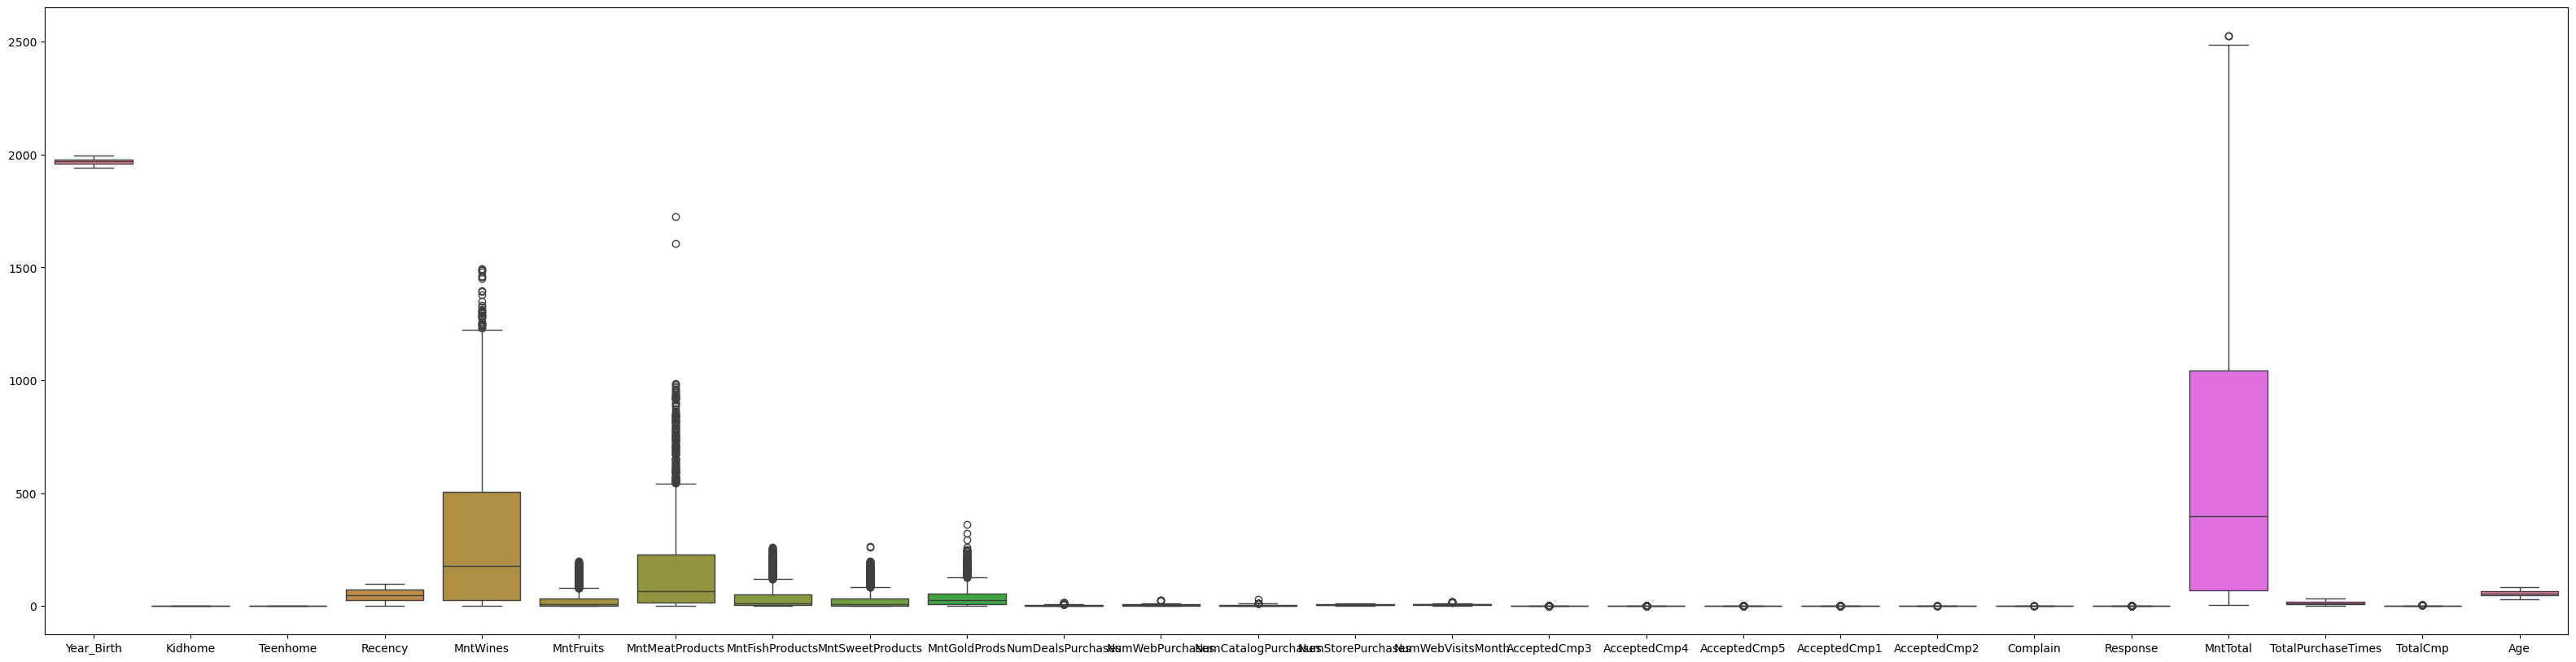

In [45]:
plt.figure(figsize=(40,10))
sns.boxplot(df.drop(columns=["Income"]).select_dtypes("number"))
# we do not want to drop most of the outliers here because in the context of sales these are positive outliers. We will use them in further analysis.

## exporting to CSV

In [46]:
df.to_csv("CleanSupermarketV2.csv")